# Simulation of MLP by using pivots and visual analytics

In [3]:
pip install mnists

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from mnists import FMNIST

RANDOM_STATE = 42

## Load and preprocess the dataset

In [5]:
def load_preprocess_fmnist():
    mnist = FMNIST()

    x_train = mnist.train_images()
    y_train = mnist.train_labels()
    x_test = mnist.test_images()
    y_test = mnist.test_labels()

    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

    return (x_train, y_train), (x_test, y_test)


NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = load_preprocess_fmnist()

X = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

In [6]:
X.shape, y.shape

((70000, 28, 28, 1), (70000,))

In [7]:
SAMPLE_SIZE = 10000  # Use only a subset of the data to speed up the process

Convert X to 2D array and select only a subset of data

In [8]:
X = X.reshape(-1, 28 * 28)[:SAMPLE_SIZE]
y = y[:SAMPLE_SIZE]
X.shape, y.shape

((10000, 784), (10000,))

## Helper functions

In [9]:
def get_centroids(X, y, k):
    centroids = []
    kmeans = KMeans(n_clusters=k)
    for i in range(NUM_CLASSES):
        X_class = X[y == i]
        kmeans.fit(X_class)
        class_centroids = kmeans.cluster_centers_
        centroids.append(class_centroids)
    return np.vstack(centroids)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def calculate_new_representation(X, centroids):
    return sigmoid(np.dot(X, centroids.T))

def visualize_tsne(X_tsne, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="tab10", alpha=0.7, s=10
    )
    plt.legend(*scatter.legend_elements(), title="Classes", loc="best", fontsize=8)
    plt.title(title)
    plt.show()

## Finding pivots (centroids)

Using kNN select 10 pivots in each class (clusterize each class into 10 clusters and select the centroids)

In [10]:
# Number of clusters in each class
k = 10

# Generate sets of centroids for subsequent transformations
centroids1 = get_centroids(X, y, k)
X1 = calculate_new_representation(X, centroids1)

centroids2 = get_centroids(X1, y, k)
X2 = calculate_new_representation(X1, centroids2)

centroids3 = get_centroids(X2, y, k)
X3 = calculate_new_representation(X2, centroids3)

centroids4 = get_centroids(X3, y, k)
X4 = calculate_new_representation(X3, centroids4)

/Users/mateu/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/mateu/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/mateu/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/mateu/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.


## Visualization with tSNE

### Computing tSNE for different representations

In [11]:
tsne = TSNE(n_components=2, random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X)
X_tsne_representations = [tsne.fit_transform(X_rep) for X_rep in [X1, X2, X3, X4]]

: 

### Visualization

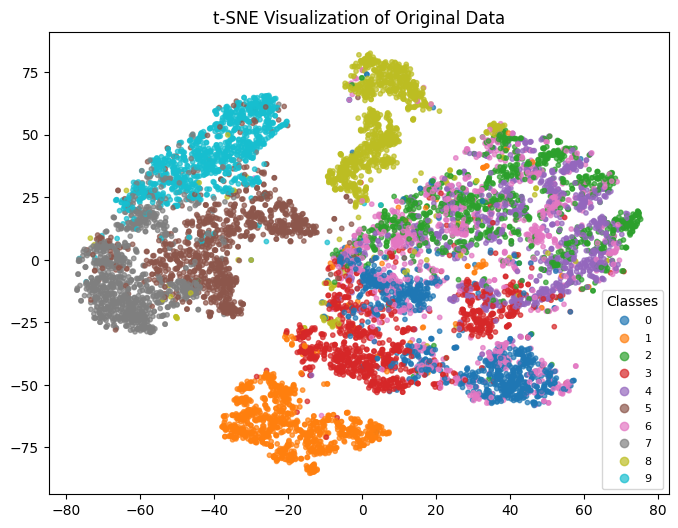

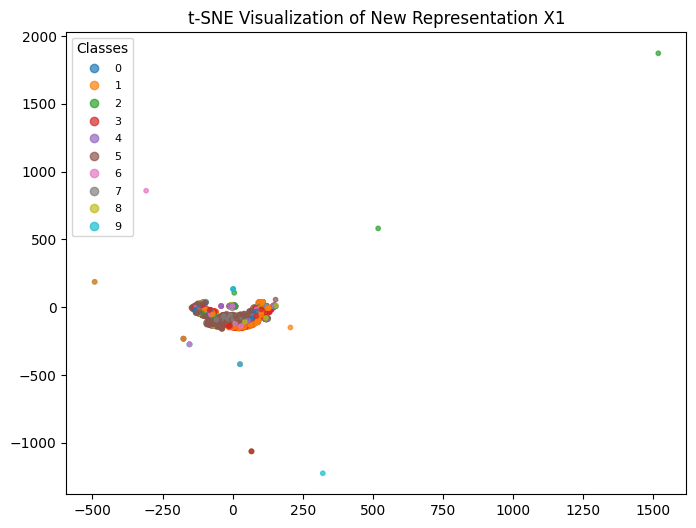

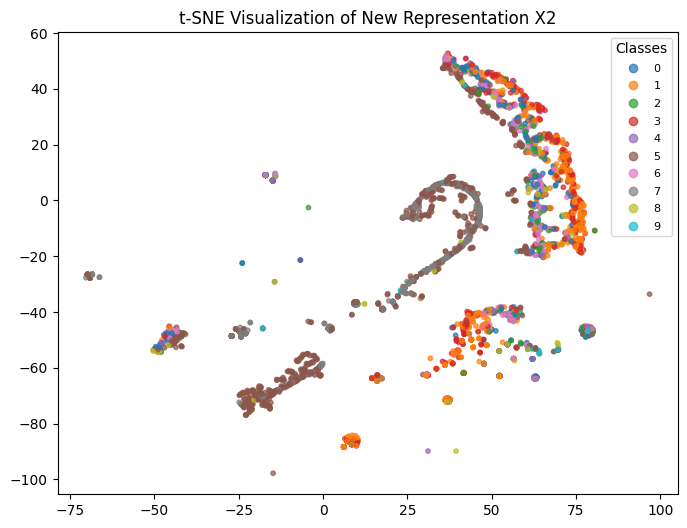

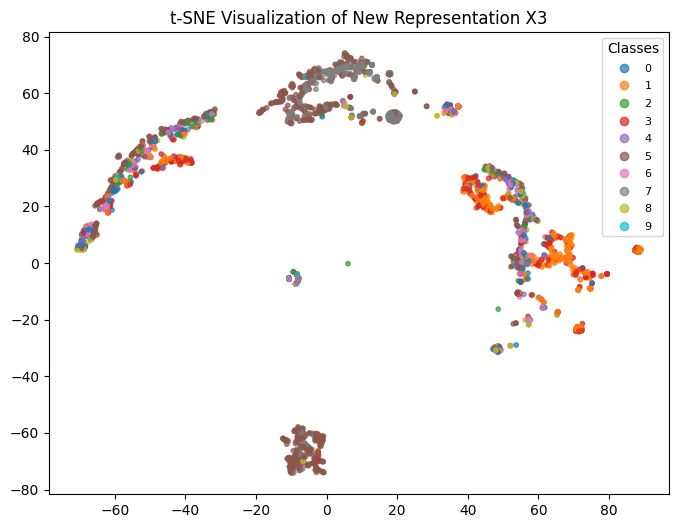

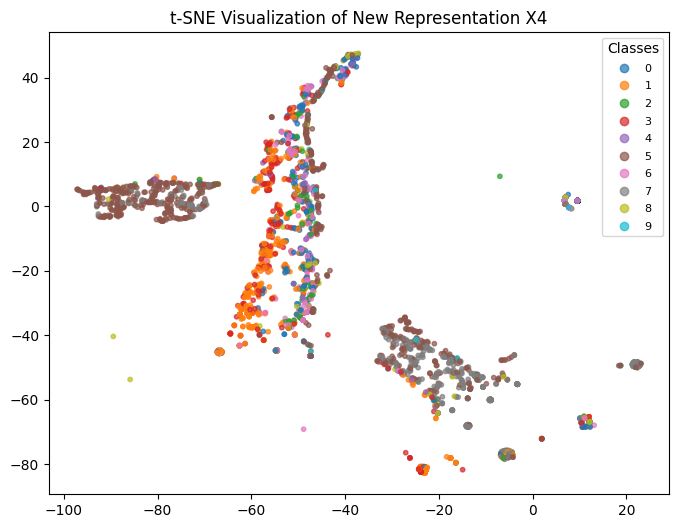

In [ ]:
# Visualize original data
visualize_tsne(X_tsne, y, "t-SNE Visualization of Original Data")

# Visualize new representations
for i, X_tsne_rep in enumerate(X_tsne_representations, start=1):
    visualize_tsne(X_tsne_rep, y, f"t-SNE Visualization of New Representation X{i}")